In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(6774, 2)

In [3]:
df.head()

,Time,domain
0,2022-01-20 18:01:40,www.google.com
1,2022-01-20 18:01:55,mail.google.com
2,2022-01-20 18:01:59,umbc.webex.com
3,2022-01-20 18:02:26,umbc.webex.com
4,2022-01-20 19:21:53,umbc.webex.com


In [4]:
df.tail()

,Time,domain
6769,2022-04-18 14:38:15,manivannan-ai.medium.com
6770,2022-04-18 14:38:16,my.umbc.edu
6771,2022-04-18 14:38:18,mail.google.com
6772,2022-04-18 14:38:21,www.google.com
6773,2022-04-18 14:38:29,browser-history.readthedocs.io


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-01-20 18:01:40,www.google.com
1,2022-01-20 18:01:55,mail.google.com
2,2022-01-20 18:01:59,umbc.webex.com
3,2022-01-20 18:02:26,umbc.webex.com
4,2022-01-20 19:21:53,umbc.webex.com


In [14]:
df['domain'].value_counts()[:50]

www.google.com                          1774
github.com                              1056
colab.research.google.com                668
webauth.umbc.edu                         667
blackboard.umbc.edu                      288
umbc-csm.symplicity.com                  263
my.umbc.edu                              215
localhost:8888                           136
www.w3schools.com                        124
myretrievercare.umbc.edu                 118
my3.my.umbc.edu                          105
csprd-web.ps.umbc.edu                     69
meet181.webex.com                         59
datasetsearch.research.google.com         55
umbc.app.box.com                          54
umbc.webex.com                            46
s3.amazonaws.com                          44
stackoverflow.com                         41
accounts.google.com                       37
www.pdbmbook.com                          36
faker.readthedocs.io                      31
catalog.data.gov                          30
campuscard

<AxesSubplot:>

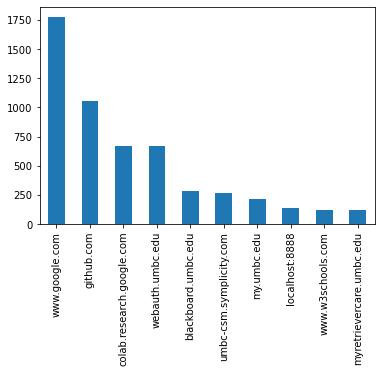

In [15]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     389
1      62
2      31
3      46
4      55
5      46
9      52
10    175
11    128
12    233
13    366
14    353
15    568
16    463
17    474
18    300
19    768
20    683
21    598
22    505
23    479
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

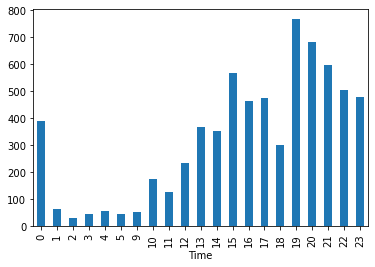

In [17]:
hourly_counts.plot.bar()


In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-01-20 18:01:40,www.google.com,Thursday,3
1,2022-01-20 18:01:55,mail.google.com,Thursday,3
2,2022-01-20 18:01:59,umbc.webex.com,Thursday,3
3,2022-01-20 18:02:26,umbc.webex.com,Thursday,3
4,2022-01-20 19:21:53,umbc.webex.com,Thursday,3


In [19]:
df['Day'].value_counts()

Tuesday      2353
Monday       1489
Thursday      918
Friday        723
Wednesday     567
Saturday      484
Sunday        240
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1489
1    2353
2     567
3     918
4     723
5     484
6     240
Name: DayIndex, dtype: int64

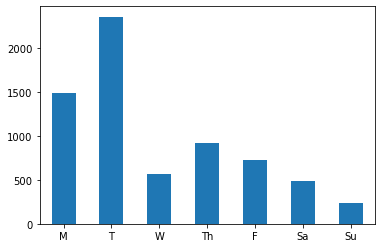

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-01-20 18:01:40,www.google.com,Thursday,3,False
1,2022-01-20 18:01:55,mail.google.com,Thursday,3,False
2,2022-01-20 18:01:59,umbc.webex.com,Thursday,3,False
3,2022-01-20 18:02:26,umbc.webex.com,Thursday,3,False
4,2022-01-20 19:21:53,umbc.webex.com,Thursday,3,False


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
1006,2022-02-12 09:14:21,blackboard.umbc.edu,Saturday,5,True
1497,2022-02-19 00:04:48,colab.research.google.com,Saturday,5,True
1498,2022-02-19 00:06:24,my.umbc.edu,Saturday,5,True
1499,2022-02-19 00:06:29,my.umbc.edu,Saturday,5,True
1500,2022-02-19 00:06:35,webauth.umbc.edu,Saturday,5,True


In [25]:
weekday['domain'].value_counts()[:5]

www.google.com               1653
github.com                    769
webauth.umbc.edu              597
colab.research.google.com     568
umbc-csm.symplicity.com       256
Name: domain, dtype: int64

In [26]:
weekend['domain'].value_counts()[:5]

github.com                   287
www.google.com               121
colab.research.google.com    100
webauth.umbc.edu              70
blackboard.umbc.edu           45
Name: domain, dtype: int64

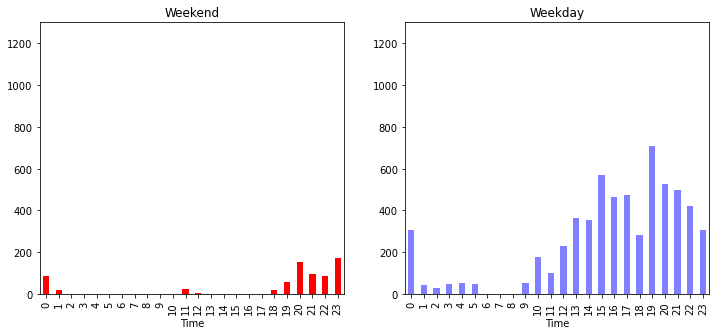

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [28]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

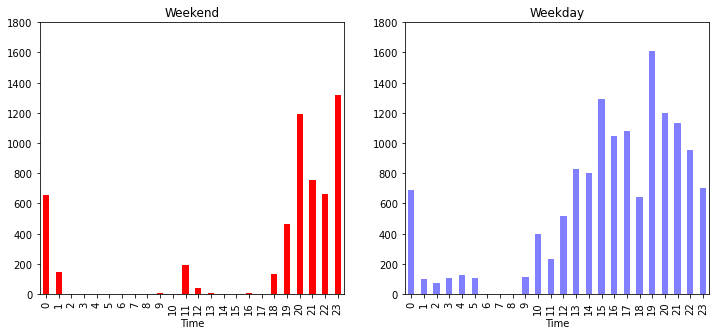

In [29]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [30]:
df['domain'].value_counts()[:20]

www.google.com                       1774
github.com                           1056
colab.research.google.com             668
webauth.umbc.edu                      667
blackboard.umbc.edu                   288
umbc-csm.symplicity.com               263
my.umbc.edu                           215
localhost:8888                        136
www.w3schools.com                     124
myretrievercare.umbc.edu              118
my3.my.umbc.edu                       105
csprd-web.ps.umbc.edu                  69
meet181.webex.com                      59
datasetsearch.research.google.com      55
umbc.app.box.com                       54
umbc.webex.com                         46
s3.amazonaws.com                       44
stackoverflow.com                      41
accounts.google.com                    37
www.pdbmbook.com                       36
Name: domain, dtype: int64

In [31]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [32]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

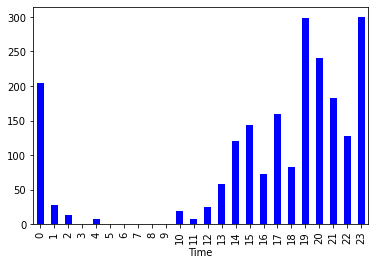

In [33]:
_= show_domain_stats('github', 'blue')

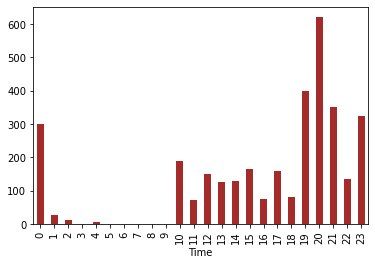

In [34]:
_= show_domain_stats('github|colab', 'brown')

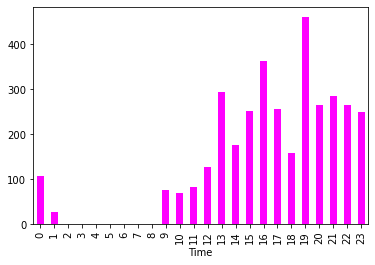

In [35]:
_ = show_domain_stats('blackboard|umbc', 'magenta')


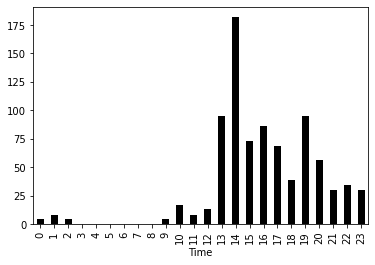

In [36]:
_ = show_domain_stats('w3schools|geeksforgeeks|stackoverflow|tutorials', 'black')

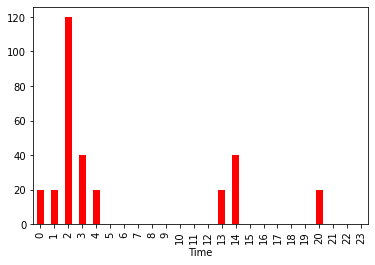

In [37]:
_ = show_domain_stats('youtube', 'red')

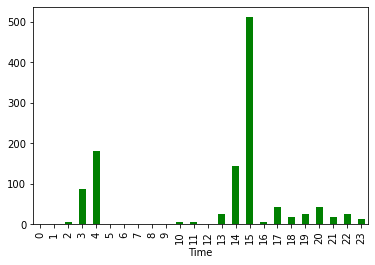

In [38]:
_=show_domain_stats('data', 'green')

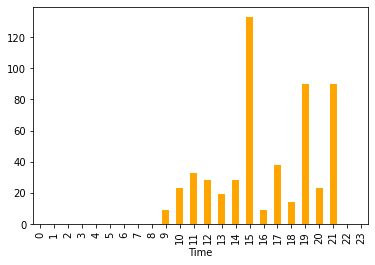

In [39]:
_ = show_domain_stats('webex', 'orange')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1. This is work Computer
2. Not employed. Might be a student at UMBC
3. Interested in Data and programming (github and colab)
4. - Might be interested in learning something from w3schools, geeksforgeeks or stackoverflow
   - Mostly active around 7 pm